In [2]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print('Pandas:', pd.__version__)  #check your env
print('Numpy:',np.__version__)
print('Matplotlib:', matplotlib. __version__)

Pandas: 0.20.1
Numpy: 1.12.1
Matplotlib: 2.0.2


In [4]:
 df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') #read dataset

In [5]:
df #look through the whole data

NameError: name 'df_droped' is not defined

In [6]:
df_droped=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1) #Drop the variables conldn't be used

In [7]:

df_droped['Pclass'] = df_droped['Pclass'].astype('str') #Transfer Pclass to string for dummy


In [8]:
df_dummy = pd.get_dummies(df_droped[["Pclass","Sex","Embarked"]]) #Get dummy variables for charater variables(Pclass is not necessary)

In [9]:
head = list(set(df_dummy.columns)) #merge dummies and original variables
#df_droped = pd.merge(df_droped,df_dummy)
df_droped[head] = df_dummy[head]

In [10]:
df_droped=df_droped.drop(["Pclass","Sex","Embarked"],axis=1) #Drop variables have dummied

In [11]:
func = lambda grp: grp.fillna(grp.median()) #Use transform func to impute NaN
df_imputed = df_droped.transform(func)
col_deleted = list( set(df_droped.columns) - set(df_imputed.columns)) 
df_imputed[col_deleted] = df_droped[col_deleted]

In [12]:
>>> from sklearn.model_selection import train_test_split #split to train and test set
df_train, df_test = train_test_split(df_imputed,test_size=0.33) 

In [13]:
target_train = df_train['Survived'] #Get the target variables and Drop it from train dataset
target_test = df_test['Survived']
df_train=df_train.drop(["Survived"],axis=1)
df_test=df_test.drop(["Survived"],axis=1)

In [15]:
>>> from sklearn.ensemble import RandomForestClassifier #Run the model
>>> from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=500,max_depth=20)
clf.fit(df_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
clf_probs = clf.predict_proba(df_test) 
#Get the prediction in probability

In [19]:
from sklearn import metrics
fpr_rt_lm, tpr_rt_lm, _ = metrics.roc_curve(target_test,clf_probs[:, 1])
metrics.auc(fpr_rt_lm, tpr_rt_lm)
#Run RUC and get AUC value

0.84910826790733751

0.84910826790733751

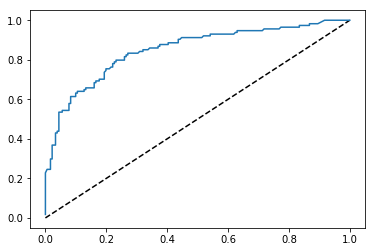

In [20]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
metrics.auc(fpr_rt_lm, tpr_rt_lm)
#plot RUC